In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D , Dense , Activation , MaxPool2D ,Flatten , BatchNormalization , Dropout , Input
from keras.models import Sequential
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns

In [2]:
x_train = np.load('x_train_ann.npy',allow_pickle=True)
x_test = np.load('x_test_ann.npy',allow_pickle=True)
y_train = np.load('y_train_ann.npy',allow_pickle=True)
y_test = np.load('y_test_ann.npy',allow_pickle=True)

In [3]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(17835, 19200) (17835, 15) (4459, 19200) (4459, 15)


In [5]:
model = Sequential()
# model.add(Input((19200,)))

model.add(Dense(1024,input_shape=((19200,))))
model.add(Activation('sigmoid'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(15))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              19661824  
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                3

In [6]:
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [7]:
# Training
hist = model.fit(x_train , y_train,
         shuffle=True,
         epochs = 40,
         
                 ,
         validation_data=(x_test,y_test))




Epoch 1/40
140/140 [==============================] - 30s 217ms/step - loss: 2.6721 - accuracy: 0.1411 - val_loss: 2.5106 - val_accuracy: 0.1996
Epoch 2/40
140/140 [==============================] - 24s 169ms/step - loss: 2.4212 - accuracy: 0.2275 - val_loss: 2.2588 - val_accuracy: 0.2718
Epoch 3/40
140/140 [==============================] - 23s 168ms/step - loss: 2.2812 - accuracy: 0.2530 - val_loss: 2.1959 - val_accuracy: 0.2835
Epoch 4/40
140/140 [==============================] - 23s 166ms/step - loss: 2.2332 - accuracy: 0.2638 - val_loss: 2.1067 - val_accuracy: 0.3057
Epoch 5/40
140/140 [==============================] - 24s 170ms/step - loss: 2.1876 - accuracy: 0.2782 - val_loss: 2.0900 - val_accuracy: 0.2992
Epoch 6/40
140/140 [==============================] - 24s 173ms/step - loss: 2.1249 - accuracy: 0.2951 - val_loss: 1.9637 - val_accuracy: 0.3496
Epoch 7/40
140/140 [==============================] - 23s 168ms/step - loss: 2.0797 - accuracy: 0.3126 - val_loss: 1.9359 - val_ac

In [8]:
actual_output = []
for y in y_test:
    actual_output.append(y.argmax())

In [9]:
actual_output = np.array(actual_output)

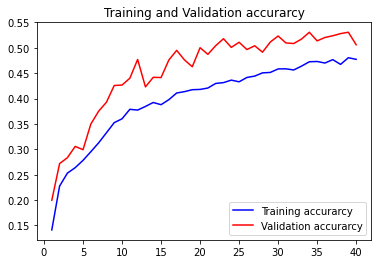

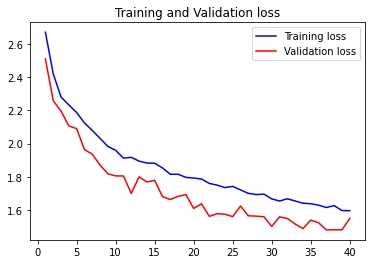

In [14]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [15]:
print("model accuracy")
scores = model.evaluate(x_test, y_test)
print('Accuracy :- ' , scores[1] , ' , Loss :- ' , scores[0])

model accuracy
140/140 [==============================] - 4s 29ms/step - loss: 1.5478 - accuracy: 0.5059
Accuracy :-  0.5059430599212646  , Loss :-  1.5478146076202393


In [16]:
preds = model.predict(x_test)
preds.shape

(4459, 15)

In [17]:
yhat = [np.argmax(i) for i in preds]

In [18]:
np.shape(yhat)

(4459,)

In [19]:
actual_output = [np.argmax(i) for i in y_test]

<AxesSubplot:>

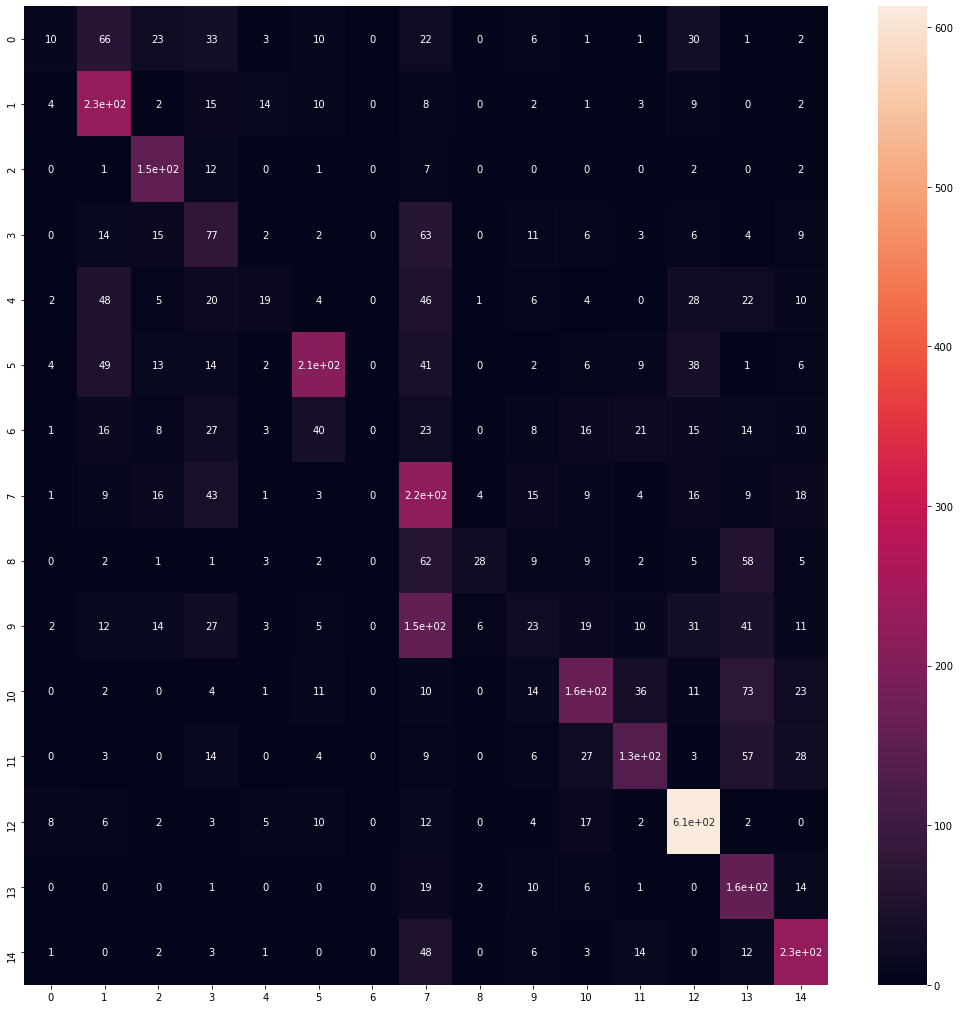

In [21]:
plt.figure(figsize=(18,18))
confusion = confusion_matrix(actual_output,yhat)
sns.heatmap(confusion, annot=True , xticklabels=True , yticklabels=True)

In [22]:
print("Confusion Matrix \n")
print(confusion_matrix(actual_output,yhat),'\n')
print('\n Classification Report\n')
print(classification_report(actual_output,yhat))

Confusion Matrix 

[[ 10  66  23  33   3  10   0  22   0   6   1   1  30   1   2]
 [  4 228   2  15  14  10   0   8   0   2   1   3   9   0   2]
 [  0   1 152  12   0   1   0   7   0   0   0   0   2   0   2]
 [  0  14  15  77   2   2   0  63   0  11   6   3   6   4   9]
 [  2  48   5  20  19   4   0  46   1   6   4   0  28  22  10]
 [  4  49  13  14   2 206   0  41   0   2   6   9  38   1   6]
 [  1  16   8  27   3  40   0  23   0   8  16  21  15  14  10]
 [  1   9  16  43   1   3   0 221   4  15   9   4  16   9  18]
 [  0   2   1   1   3   2   0  62  28   9   9   2   5  58   5]
 [  2  12  14  27   3   5   0 154   6  23  19  10  31  41  11]
 [  0   2   0   4   1  11   0  10   0  14 163  36  11  73  23]
 [  0   3   0  14   0   4   0   9   0   6  27 134   3  57  28]
 [  8   6   2   3   5  10   0  12   0   4  17   2 613   2   0]
 [  0   0   0   1   0   0   0  19   2  10   6   1   0 155  14]
 [  1   0   2   3   1   0   0  48   0   6   3  14   0  12 227]] 


 Classification Report

        

c:\users\captan pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
